In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
# Features (e.g., median income)
X = df[['MedInc']]   # Using one feature for visualization
y = df['MedHouseVal']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Intercept: 0.4445972916907879
Coefficient: 0.4193384939381271
Mean Squared Error: 0.7091157771765549
R² Score: 0.45885918903846656


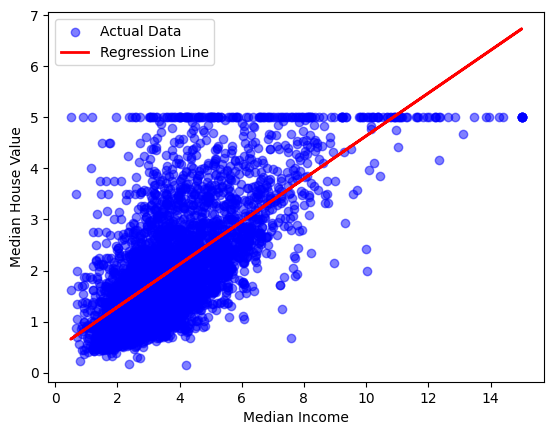

In [ ]:
plt.scatter(X_test, y_test, color="blue", label="Actual Data", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()


In [1]:
print("the following code is using numpy")

the following code is using numpy


Intercept (b0): 0.44459729169079276
Coefficient (b1): 0.41933849393812644
Mean Squared Error: 0.7091157771765548
R² Score: 0.45885918903846656


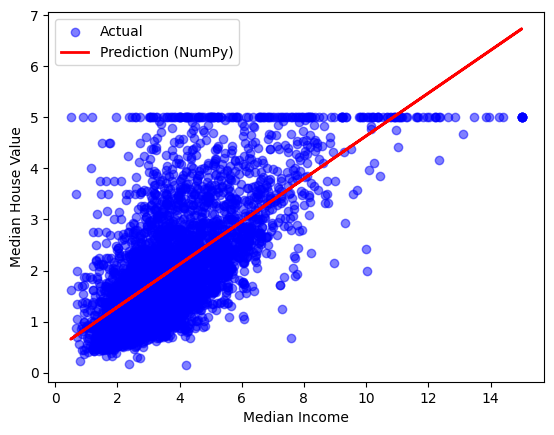

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df[['MedInc']].values   # feature (2D numpy array)
y = df['MedHouseVal'].values.reshape(-1, 1)  # target (2D column vector)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # add bias column
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print("Intercept (b0):", theta_best[0][0])
print("Coefficient (b1):", theta_best[1][0])
y_pred = X_test_b.dot(theta_best)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediction (NumPy)")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()


In [2]:
print("the following code is using pytorch")

the following code is using pytorch


Epoch  100/1000 - Train MSE: 0.712699
Epoch  200/1000 - Train MSE: 0.700591
Epoch  300/1000 - Train MSE: 0.699211
Epoch  400/1000 - Train MSE: 0.699146
Epoch  500/1000 - Train MSE: 0.699145
Epoch  600/1000 - Train MSE: 0.699145
Epoch  700/1000 - Train MSE: 0.699145
Epoch  800/1000 - Train MSE: 0.699145
Epoch  900/1000 - Train MSE: 0.699145
Epoch 1000/1000 - Train MSE: 0.699145

Learned parameters: weight (slope) = 0.419338, bias (intercept) = 0.444598
Test MSE: 0.709116
Test R^2: 0.458859


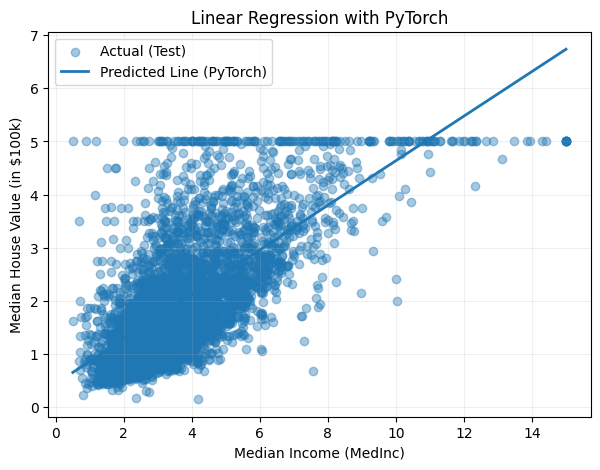

In [3]:
# ===== Linear Regression with PyTorch (California Housing: MedInc -> MedHouseVal) =====
# One code block you can paste into Colab and run.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # DataFrame with features + target

# 2) Select ONE feature (MedInc) and target (MedHouseVal)
X = df[['MedInc']].values.astype(np.float32)          # shape: (n_samples, 1)
y = df[['MedHouseVal']].values.astype(np.float32)     # shape: (n_samples, 1)

# 3) Train/Test split
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Convert to PyTorch tensors
X_train = torch.from_numpy(X_train_np)  # (N, 1)
y_train = torch.from_numpy(y_train_np)  # (N, 1)
X_test  = torch.from_numpy(X_test_np)   # (M, 1)
y_test  = torch.from_numpy(y_test_np)   # (M, 1)

# 5) Define a simple linear model: y_hat = w*x + b
model = nn.Sequential(nn.Linear(1, 1))  # bias=True by default => learns intercept

# 6) Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

# 7) Train loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred_train = model(X_train)        # forward pass
    loss = criterion(y_pred_train, y_train)
    loss.backward()                      # compute gradients
    optimizer.step()                     # update w, b

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1:4d}/{epochs} - Train MSE: {loss.item():.6f}")

# 8) Extract learned parameters
lin: nn.Linear = model[0]
w = lin.weight.detach().item()
b = lin.bias.detach().item()
print(f"\nLearned parameters: weight (slope) = {w:.6f}, bias (intercept) = {b:.6f}")

# 9) Evaluate on test data
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).numpy()

mse = mean_squared_error(y_test_np, y_pred_test)
r2  = r2_score(y_test_np, y_pred_test)
print(f"Test MSE: {mse:.6f}")
print(f"Test R^2: {r2:.6f}")

# 10) Plot (scatter actual vs. line of predictions)
# Sort by X for a clean line plot
order = np.argsort(X_test_np[:, 0])
X_plot = X_test_np[order]
y_plot = y_pred_test[order]

plt.figure(figsize=(7,5))
plt.scatter(X_test_np, y_test_np, alpha=0.4, label="Actual (Test)")
plt.plot(X_plot, y_plot, linewidth=2, label="Predicted Line (PyTorch)")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (in $100k)")
plt.title("Linear Regression with PyTorch")
plt.legend()
plt.grid(alpha=0.2)
plt.show()
